#Importing Libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


#Loading Dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/FYP_Datasets/Heart_disease.csv")

In [3]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


#Data Preprocessing

In [4]:
data["chest pain type"] = data["chest pain type"].astype(str).replace({"1":"typical angina",
                                                                       "2":"atypical angina",
                                                                       "3":"non-anginal pain",
                                                                       "4":"asymptomatic"
                                                                       })
data["resting ecg"] = data["resting ecg"].astype(str).replace({"0":"normal",
                                                               "1":"ST-T wave abnormality",
                                                               "2":"left ventricular hypertrophy"})
data["ST slope"] = data["ST slope"].astype(str).replace({"0":"normal",
                                                         "1":"upsloping",
                                                         "2":"flat",
                                                         "3":"downsloping"})


In [5]:
data = pd.get_dummies(data, columns = ["chest pain type", "ST slope","resting ecg"])

In [6]:
data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


In [7]:
data.shape

(1190, 20)

In [8]:
data.isnull().sum()

age                                         0
sex                                         0
resting bp s                                0
cholesterol                                 0
fasting blood sugar                         0
max heart rate                              0
exercise angina                             0
oldpeak                                     0
target                                      0
chest pain type_asymptomatic                0
chest pain type_atypical angina             0
chest pain type_non-anginal pain            0
chest pain type_typical angina              0
ST slope_downsloping                        0
ST slope_flat                               0
ST slope_normal                             0
ST slope_upsloping                          0
resting ecg_ST-T wave abnormality           0
resting ecg_left ventricular hypertrophy    0
resting ecg_normal                          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       1190 non-null   int64  
 1   sex                                       1190 non-null   int64  
 2   resting bp s                              1190 non-null   int64  
 3   cholesterol                               1190 non-null   int64  
 4   fasting blood sugar                       1190 non-null   int64  
 5   max heart rate                            1190 non-null   int64  
 6   exercise angina                           1190 non-null   int64  
 7   oldpeak                                   1190 non-null   float64
 8   target                                    1190 non-null   int64  
 9   chest pain type_asymptomatic              1190 non-null   uint8  
 10  chest pain type_atypical angina     

In [10]:
data.describe()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571,0.525210,0.181513,0.237815,0.055462,0.068067,0.489076,0.000840,0.442017,0.152101,0.273109,0.574790
std,9.358203,0.424884,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393,0.499574,0.385604,0.425924,0.228976,0.251967,0.500091,0.028989,0.496835,0.359270,0.445744,0.494583
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,1.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data["target"].value_counts()

1    629
0    561
Name: target, dtype: int64

In [12]:
data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


#Detecting outliers

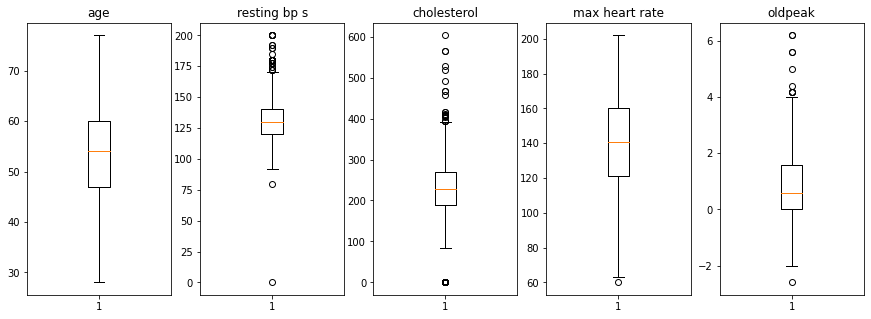

In [13]:
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.boxplot(col[i],data = data)
  plt.title(col[i])

#Removing Outliers

In [14]:
cols = ["resting bp s","cholesterol","oldpeak"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


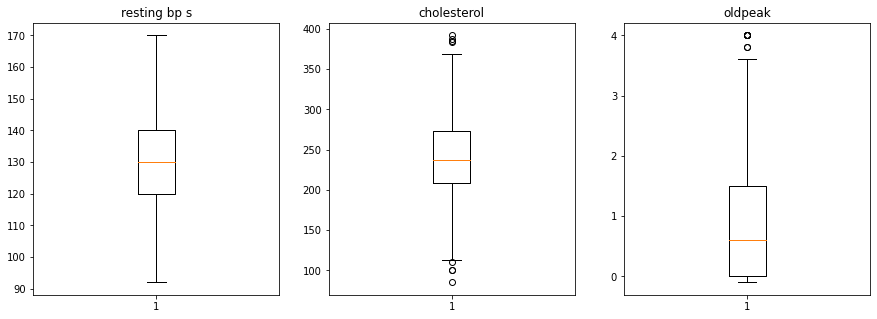

In [15]:
cols = ["resting bp s","cholesterol","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

In [16]:
cols = ["cholesterol","oldpeak"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


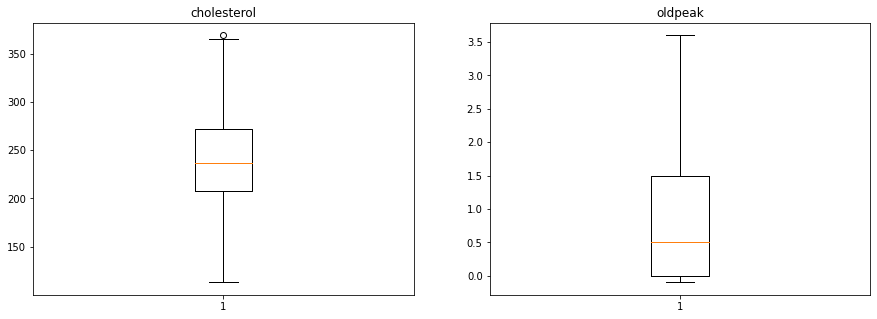

In [17]:
cols = ["cholesterol","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

In [18]:
cols = ["cholesterol"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


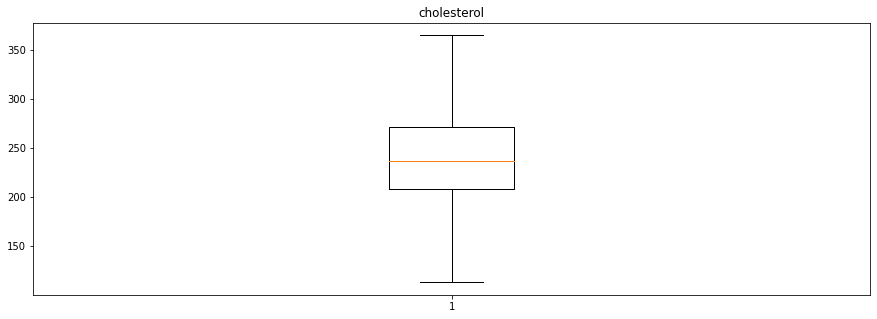

In [19]:
cols = ["cholesterol"]
plt.figure(figsize = (15,5))
for i in range(1):
  plt.subplot(1,1,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

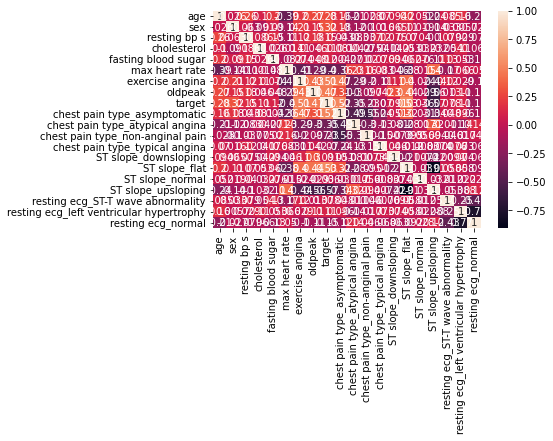

In [20]:
plt.plot(figsize = (100,100))
sns.heatmap(data.corr(),annot = True)
plt.show()

#Spliting the dependent and independent variables

In [21]:
Input = data.drop("target",axis = 1)
Output = data["target"]

#Spliting the data into train and test

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Output,test_size = 0.3, random_state = 55)


#Normalizing the Data

In [23]:
minmax = MinMaxScaler()
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
X_train[col] = minmax.fit_transform(X_train[col])
X_test[col] = minmax.transform(X_test[col])


#Logistic Regression Model

In [24]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train,Y_train)

LogisticRegression()

#Train Accuracy

In [25]:
model.score(X_train,Y_train)

0.8545454545454545

#Test Accuracy

In [26]:
Y_pred = model.predict(X_test)
model.score(X_test,Y_test)

0.8204225352112676

#Confusion Matrix

In [27]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[127,  25],
       [ 26, 106]])

[]

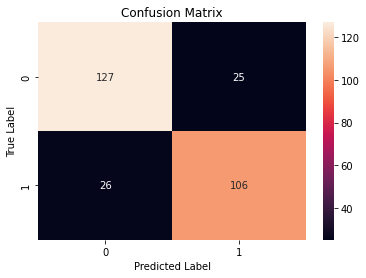

In [28]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

#Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

#Train Accuracy

In [30]:
rf.score(X_train,Y_train)

1.0

#Test Accuracy

In [31]:
Y_pred = rf.predict(X_test)
model.score(X_test,Y_test)

0.8204225352112676

#Confusion Matrix

In [32]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[142,  10],
       [ 13, 119]])

[]

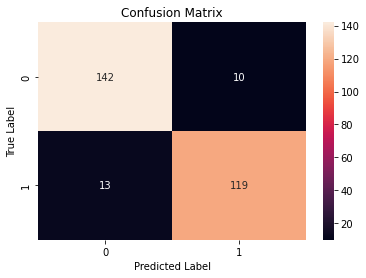

In [33]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

#Random Forest Hyperparameter tuning

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
rf_cv = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_cv, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [36]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [38]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       n_estimators=600)

In [39]:
rf_best = RandomForestClassifier(bootstrap = False, max_depth= 60, max_features =  'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 600)
rf_best.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       n_estimators=600)

#Random Forest Train Accuracy After Hyperparameter Tuning

In [40]:
rf_best.score(X_train,Y_train)


0.996969696969697

#Random Forest Test Accuracy After Hyperparameter Tuning

In [41]:
Y_pred = rf_best.predict(X_test)
rf_best.score(X_test,Y_test)

0.9330985915492958

#Confusion Matrix

In [42]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[145,   7],
       [ 12, 120]])

[]

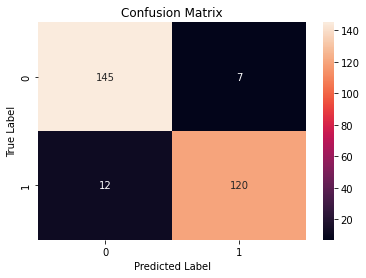

In [43]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

#XGBoost Classifier

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
xgb.score(X_test,Y_test)

0.9084507042253521

In [45]:
xgb.score(X_train,Y_train)

0.9515151515151515

In [46]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [47]:
random_search=RandomizedSearchCV(estimator = xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [48]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [49]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 3}

In [50]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6,
              min_child_weight=3)

In [51]:
random_search.score(X_test,Y_test)
random_search.score(X_train,Y_train)
random_search.cv_results_

{'mean_fit_time': array([0.09594884, 0.05688658, 0.09173322, 0.08159451, 0.07704148]),
 'mean_score_time': array([0.00698609, 0.00505414, 0.0051867 , 0.00521922, 0.00502577]),
 'mean_test_score': array([0.93758997, 0.93308567, 0.9454841 , 0.9398189 , 0.93628976]),
 'param_colsample_bytree': masked_array(data=[0.7, 0.3, 0.5, 0.4, 0.7],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 0.3, 0.0, 0.2, 0.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.25, 0.25, 0.15, 0.05, 0.15],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[15, 3, 6, 6, 4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(

In [52]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 3}

In [53]:
random_search.best_score_

0.9454840956582308

In [54]:
xgb_best = XGBClassifier(colsample_bytree= 0.4,
 gamma= 0.4,
 learning_rate= 0.3,
 max_depth=5,
 min_child_weight= 1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
xgb_best.fit(X_train,Y_train)

XGBClassifier(colsample_bytree=0.4, cv=5, gamma=0.4, learning_rate=0.3,
              max_depth=5, n_iter=5, n_jobs=-1, scoring='roc_auc', verbose=3)

In [56]:
xgb_best.score(X_test,Y_test)

0.9190140845070423

#Model With Training and Testing Accuracy

In [64]:
accuracy_of_models = pd.DataFrame({
    "Train Accuracy":[model.score(X_train,Y_train),
             rf.score(X_train,Y_train),
             rf_best.score(X_train,Y_train),
             xgb.score(X_train,Y_train),
             xgb_best.score(X_train,Y_train)],
    "Test Accuracy":[model.score(X_test,Y_test),
            rf.score(X_test,Y_test),
            rf_best.score(X_test,Y_test),
            xgb.score(X_test,Y_test),
            xgb_best.score(X_test,Y_test)]
            },
            index = ["Logistic Regression",
                     "Random Forest Without Hyperparameter Tuning",
                     "Random Forest With Hyperparameter Tuning",
                     "XGB without Hyperparameter Tuning",
                     "XGB with Hyperparameter tuning"
                     ])
accuracy_of_models["Train Accuracy"] = accuracy_of_models["Train Accuracy"]*100
accuracy_of_models["Test Accuracy"] = accuracy_of_models["Test Accuracy"]*100
accuracy_of_models

,Train Accuracy,Test Accuracy
Logistic Regression,85.454545,82.042254
Random Forest Without Hyperparameter Tuning,100.000000,91.901408
Random Forest With Hyperparameter Tuning,99.696970,93.309859
XGB without Hyperparameter Tuning,95.151515,90.845070
XGB with Hyperparameter tuning,100.000000,91.901408


In [65]:
pickle.dump(rf_best,open("heart_disease_rf_model.pkl","wb"))